In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [2]:
# Formating options for the plot
import pylab
params = {'backend': 'ps',
          'axes.labelsize': 20,
          'legend.fontsize': 20,
          'legend.handlelength': 2.0,
          'legend.borderaxespad': 0,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'font.family': 'serif',
          'font.size': 20,
          'font.weight': 'normal',
          #'font.serif': ['Palatino'],
          'ps.usedistiller': 'xpdf',
          'text.usetex': False}
pylab.rcParams.update(params)


In [3]:
# Plot size setup
fw = 8.5
fh = 7.5
fsl = 20
fsl2 = 24

In [4]:
# Importing dynamic porosity simulation results for 2150 years from GitHub
url_d = "https://raw.githubusercontent.com/Achla-Jha/Soil-Structure/main/results_simulations_dynamic_porosity.csv"
df1 = pd.read_csv(url_d)
df1

,Years,A,B,DOC,Fa,Fal,Fbm,Fl,Flb,Fld,Flm,Fpa,Fpl,M,P,ksstr,lk,phi,s
0,1,779.640492,86.981520,75.339150,0.261139,0.017025,0.478441,0.000089,0.839164,0.936495,0.993512,0.186759,0.466868,1160.507119,31.925600,0.768990,7.274044e-08,0.585443,0.317573
1,2,723.955242,39.826220,77.592341,0.246117,0.013992,0.219063,0.000166,0.390936,0.941572,0.958431,0.107878,0.179213,1166.796586,10.150688,0.710763,1.377789e-07,0.578974,0.325439
2,3,674.807587,20.093114,89.445806,0.236482,0.010966,0.110519,0.000409,0.224101,0.949103,0.992901,0.128890,0.147845,1176.130199,9.948463,0.640735,3.286096e-07,0.571193,0.335211
3,4,640.263710,11.487601,107.505599,0.201112,0.007258,0.063185,0.000045,0.135408,0.953524,0.971247,0.132790,0.106860,1181.608040,10.348650,0.579435,2.137043e-08,0.564382,0.302050
4,5,615.216493,7.998864,120.183399,0.204248,0.006079,0.043995,0.000143,0.108663,0.960778,0.973814,0.150265,0.093479,1190.596960,10.385022,0.528618,6.962266e-08,0.558735,0.318472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,2146,847.228669,169.402417,116.879883,0.302682,0.021022,0.931712,0.000173,2.681395,0.963289,0.952829,0.307644,1.129022,1193.706926,82.652528,0.815997,8.378813e-08,0.590666,0.338336
2146,2147,842.175041,166.275000,117.113443,0.290628,0.020161,0.914517,0.000268,2.557445,0.961985,0.953756,0.302968,1.074669,1192.091481,80.474802,0.813229,1.370825e-07,0.590359,0.331896
2147,2148,842.839478,161.289361,126.452671,0.272375,0.018856,0.887093,0.000105,2.512667,0.961939,0.956870,0.297587,1.057989,1192.034061,88.965598,0.813599,4.765411e-08,0.590400,0.311133
2148,2149,844.744338,162.810885,126.421934,0.285172,0.019754,0.895455,0.000843,2.617899,0.962813,0.983912,0.308384,1.110337,1193.119286,89.579292,0.814652,5.177092e-07,0.590517,0.325357


In [5]:
# Dynamic porosity results for 150 years post 2000 year spinup
df2 = df1.loc[2000:]
df2 = df2.reset_index()
df2

,index,Years,A,B,DOC,Fa,Fal,Fbm,Fl,Flb,Fld,Flm,Fpa,Fpl,M,P,ksstr,lk,phi,s
0,2000,2001,358.482176,5.527728,178.926982,0.113845,0.002683,0.030403,0.000047,0.085540,0.972701,0.962063,0.118081,0.034819,1205.370356,4.872105,0.047525,1.289363e-08,0.505281,0.305585
1,2001,2002,362.486271,5.199691,184.417166,0.112724,0.002545,0.028598,0.000227,0.081275,0.972023,0.976895,0.142710,0.040609,1204.531664,6.073156,0.050661,7.238994e-08,0.505629,0.310187
2,2002,2003,381.143299,5.619637,201.911626,0.112563,0.002684,0.030908,0.000033,0.093671,0.973385,0.981911,0.190977,0.059272,1206.218583,9.160689,0.067408,8.315254e-09,0.507490,0.288588
3,2003,2004,414.762511,7.821171,228.087569,0.132631,0.003911,0.043014,0.000068,0.159093,0.977996,0.995430,0.239446,0.097099,1211.933944,11.433785,0.106850,1.403680e-08,0.511872,0.308902
4,2004,2005,451.001158,17.637817,245.245719,0.153034,0.006698,0.096998,0.000150,0.405351,0.980964,0.982597,0.252070,0.161732,1215.610853,12.193806,0.163448,3.229103e-08,0.518161,0.325332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2145,2146,847.228669,169.402417,116.879883,0.302682,0.021022,0.931712,0.000173,2.681395,0.963289,0.952829,0.307644,1.129022,1193.706926,82.652528,0.815997,8.378813e-08,0.590666,0.338336
146,2146,2147,842.175041,166.275000,117.113443,0.290628,0.020161,0.914517,0.000268,2.557445,0.961985,0.953756,0.302968,1.074669,1192.091481,80.474802,0.813229,1.370825e-07,0.590359,0.331896
147,2147,2148,842.839478,161.289361,126.452671,0.272375,0.018856,0.887093,0.000105,2.512667,0.961939,0.956870,0.297587,1.057989,1192.034061,88.965598,0.813599,4.765411e-08,0.590400,0.311133
148,2148,2149,844.744338,162.810885,126.421934,0.285172,0.019754,0.895455,0.000843,2.617899,0.962813,0.983912,0.308384,1.110337,1193.119286,89.579292,0.814652,5.177092e-07,0.590517,0.325357


In [6]:
# Importing constant porosity simulation results for 2150 years from GitHub
url_c = "https://raw.githubusercontent.com/Achla-Jha/Soil-Structure/main/results_simulations_constant_porosity.csv"
df3 = pd.read_csv(url_c)
df3

,Years,A,B,DOC,Fa,Fal,Fbm,Fl,Flb,Fld,Flm,Fpa,Fpl,M,P,ksstr,lk,phi,s
0,1,780.051132,81.190534,90.207844,0.271137,0.017450,0.446593,0.000203,0.714226,0.944761,1.063616,0.191288,0.473027,1170.752308,32.562723,0.0,1.283830e-07,0.514,0.340071
1,2,723.968783,35.767075,102.861923,0.240874,0.013279,0.196736,0.000289,0.344027,0.954352,0.972289,0.108038,0.173242,1182.633560,10.351425,0.0,1.798735e-07,0.514,0.325396
2,3,678.057583,18.076764,119.934288,0.215881,0.009585,0.099429,0.000053,0.197664,0.959252,0.958896,0.120592,0.133618,1188.704625,10.378105,0.0,2.149645e-08,0.514,0.309893
3,4,644.722034,10.922766,138.720301,0.200695,0.007109,0.060078,0.000069,0.135325,0.962569,0.992732,0.133252,0.106762,1192.816988,10.689755,0.0,2.618109e-08,0.514,0.303024
4,5,620.947570,7.838261,152.065398,0.203228,0.005973,0.043112,0.000312,0.109687,0.968251,0.978466,0.149871,0.093453,1199.857020,10.699220,0.0,1.274007e-07,0.514,0.317198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,2146,842.457965,163.675686,170.000538,0.280621,0.019446,0.900219,0.001476,2.532338,0.972614,0.964160,0.299217,1.061855,1205.262733,84.196888,0.0,5.962352e-07,0.514,0.335252
2146,2147,845.176199,159.564746,177.941790,0.262170,0.018134,0.877606,0.000068,2.503699,0.971579,0.976588,0.292915,1.055796,1203.980600,95.457206,0.0,1.970356e-08,0.514,0.298699
2147,2148,848.605981,162.547810,175.972420,0.271940,0.018834,0.894009,0.000058,2.597784,0.971943,0.980579,0.297035,1.096415,1204.431757,96.211336,0.0,1.563036e-08,0.514,0.309755
2148,2149,849.748203,165.205328,171.466789,0.284750,0.019744,0.908625,0.000160,2.655402,0.972553,0.974489,0.302282,1.125567,1205.187374,92.981763,0.0,5.056527e-08,0.514,0.325137


In [7]:
# constant porosity results for 150 years post 2000 year spinup
df4 = df3.loc[2000:]
df4 = df4.reset_index()
df4

,index,Years,A,B,DOC,Fa,Fal,Fbm,Fl,Flb,Fld,Flm,Fpa,Fpl,M,P,ksstr,lk,phi,s
0,2000,2001,365.286975,6.061228,177.354270,0.118546,0.002974,0.033337,0.000069,0.098380,0.972747,0.972943,0.120207,0.038144,1205.428053,4.907040,0.0,1.914895e-08,0.514,0.311864
1,2001,2002,366.756667,6.721758,176.766742,0.124448,0.003338,0.036969,0.000289,0.111938,0.973934,0.966558,0.145625,0.049624,1206.899024,5.769567,0.0,9.023295e-08,0.514,0.332438
2,2002,2003,382.326865,7.311879,194.556162,0.108774,0.003076,0.040215,0.000044,0.117687,0.972048,0.960922,0.177846,0.065476,1204.562029,8.891060,0.0,1.137869e-08,0.514,0.282010
3,2003,2004,413.681235,9.260283,217.871459,0.138415,0.004532,0.050928,0.000137,0.189220,0.977105,1.016585,0.240393,0.107452,1210.829813,10.989235,0.0,3.080137e-08,0.514,0.321851
4,2004,2005,446.901797,19.069364,231.826428,0.147466,0.006683,0.104874,0.000223,0.397005,0.979606,0.967039,0.241692,0.159636,1213.927588,11.934923,0.0,5.283248e-08,0.514,0.318113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2145,2146,842.457965,163.675686,170.000538,0.280621,0.019446,0.900219,0.001476,2.532338,0.972614,0.964160,0.299217,1.061855,1205.262733,84.196888,0.0,5.962352e-07,0.514,0.335252
146,2146,2147,845.176199,159.564746,177.941790,0.262170,0.018134,0.877606,0.000068,2.503699,0.971579,0.976588,0.292915,1.055796,1203.980600,95.457206,0.0,1.970356e-08,0.514,0.298699
147,2147,2148,848.605981,162.547810,175.972420,0.271940,0.018834,0.894009,0.000058,2.597784,0.971943,0.980579,0.297035,1.096415,1204.431757,96.211336,0.0,1.563036e-08,0.514,0.309755
148,2148,2149,849.748203,165.205328,171.466789,0.284750,0.019744,0.908625,0.000160,2.655402,0.972553,0.974489,0.302282,1.125567,1205.187374,92.981763,0.0,5.056527e-08,0.514,0.325137


In [8]:
# # # NPP data (Xie et al.(2014))
# # Abandonment years
x1 = np.array([14, 60, 150])
# # Annual NPP 
y5 = np.array([375, 364, 631])

In [9]:
def func(x1,a1,b1):      
    """
    MONOD FUNCTION TO FIT THE NPP DATA
    """
    return a1*x1/(b1+x1) 

In [10]:
# Fitting the data for different sampling sites
t1= np.linspace(1,150,150)
yest=func(t1,a1=650,b1=15)

Text(1.0, 1.0, '(a)')

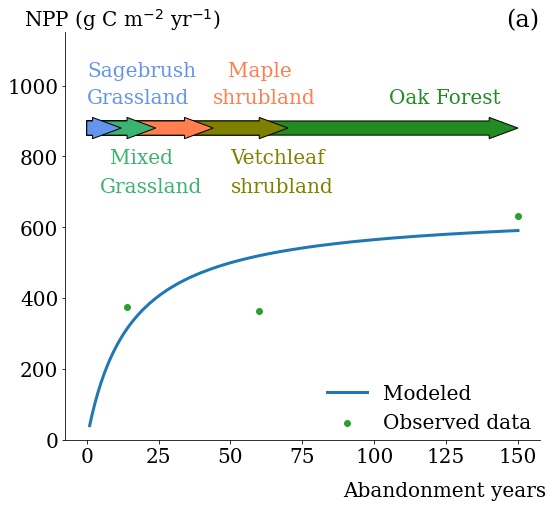

In [11]:
# NPP 
fig = plt.figure(figsize=(fw, fh))
ax1 = fig.add_subplot(111)
ax1.scatter(x1,y5, color='tab:green',linestyle='None',marker='o', label="Observed data")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticks(np.arange(0, 175, 25))
ax1.set_ylim(0, 1150)
ax1.set_xlabel(r'Abandonment years', fontsize=fsl)
ax1.set_ylabel(r'NPP (g C m$^{-2}$ yr$^{-1}$)', rotation=0, fontsize=fsl, labelpad=22)
ax1.xaxis.set_label_coords(0.80, -0.10)
ax1.yaxis.set_label_coords(0.12, 1.00)
ax1.plot(t1,yest,lw=3,label="Modeled")
ax1.legend(frameon=False, loc="lower right")
plt.arrow(0, 880, 140, 0, head_width=60, width = 40, head_length=10, facecolor='Forestgreen')
plt.text(105, 950, 'Oak Forest', color='Forestgreen', fontsize = fsl)
plt.arrow(0, 880, 60, 0, head_width=60, width = 40, head_length=10, facecolor='olive')
plt.text(50, 780, 'Vetchleaf', color='olive', fontsize = fsl)
plt.text(50, 700, 'shrubland', color='olive', fontsize = fsl)
plt.arrow(0, 880, 34, 0, head_width=60, width = 40, head_length=10, facecolor='coral')
plt.text(49, 1025, 'Maple', color='coral', fontsize = fsl)
plt.text(44, 950, 'shrubland', color='coral', fontsize = fsl)
plt.arrow(0, 880, 14, 0, head_width=60, width = 40, head_length=10, facecolor='mediumseagreen')
plt.text(8, 780, 'Mixed', color='mediumseagreen', fontsize = fsl)
plt.text(4.5, 700, 'Grassland', color='mediumseagreen', fontsize = fsl)
plt.arrow(0, 880, 2, 0, head_width=60, width = 40, head_length=10, facecolor='cornflowerblue')
plt.text(0.05, 1025, 'Sagebrush', color='cornflowerblue', fontsize = fsl)
plt.text(0.15, 950, 'Grassland', color='cornflowerblue', fontsize = fsl)
plt.title('(a)',loc= 'right')

In [12]:
# # # Data (Li & Shao (2005))
# # Abandonment years
x = np.array([1, 2, 14, 34, 60, 150]) 

# # Total Porosity
y1 = np.array([0.514, 0.556, 0.558, 0.612, 0.561, 0.627])
e1 = np.array([0.036, 0.046, 0.038, 0.055, 0.017, 0.012])

# # Total Saturated Hydraulic Conductivity Ks
y2 = np.array([7.2, 16.8, 10.2, 46.8, 22.2, 33]) * (24/1000) # unit conversion to m/d
e2 = np.array([6.6, 13.2, 6, 22.2, 16.2, 13.2]) * (24/1000)  # unit conversion to m/d

# # Mean Weight Diameter of aggregates
y3 = np.array([1, 1.6, 1.7, 1.57, 2.42 , 2.14]) 
e3 = np.array([0.2, 0.5, 0.0, 0.10 ,0.2,0.2])


# # SOC
y6 = np.array([0.44 ,0.60, 0.85, 1.23, 1.66, 1.38]) # Soil organic matter (SOM)
bd = np.array([1.29, 1.17, 1.17, 1.03, 1.16, 0.99]) # Bulk density
# soc(g/m2)= ((som/1.724)%)*(bd*depth)*(Megagram to gram conversion)
y6b = (y6/100)*(bd*0.2)*1000_000





Text(1.0, 1.0, '(b)')

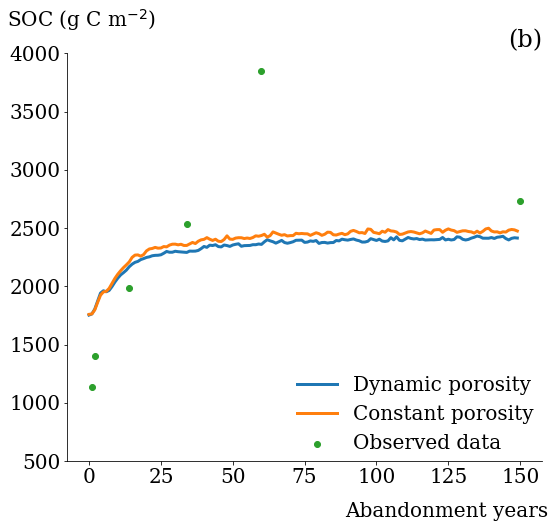

In [13]:
# Soil organic carbon (SOC)
fig = plt.figure(figsize=(fw, fh))
ax1 = fig.add_subplot(111)
ax1.plot(df2["P"]+ df2["DOC"] + df2["M"] + df2["A"]+ df2["B"], lw=3, label="Dynamic porosity")
ax1.plot(df4["P"]+ df4["DOC"] + df4["M"] + df4["A"]+ df4["B"], lw=3, label="Constant porosity")
ax1.scatter(x, y6b, linestyle='None', color= 'tab:green', marker='o', label="Observed data")
ax1.legend(frameon=False, loc="lower right")
ax1.set_xticks(np.arange(0, 175, 25))
ax1.set_yticks(np.arange(500, 4500, 500))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel(r'Abandonment years', fontsize=fsl)
ax1.set_ylabel(r'SOC (g C m$^{-2}$)', rotation=0, fontsize=fsl, labelpad=20)
ax1.xaxis.set_label_coords(0.80, -0.10)
ax1.yaxis.set_label_coords(0.03, 1.05)
plt.title('(b)',loc= 'right')

Text(1.0, 1.0, '(c)')

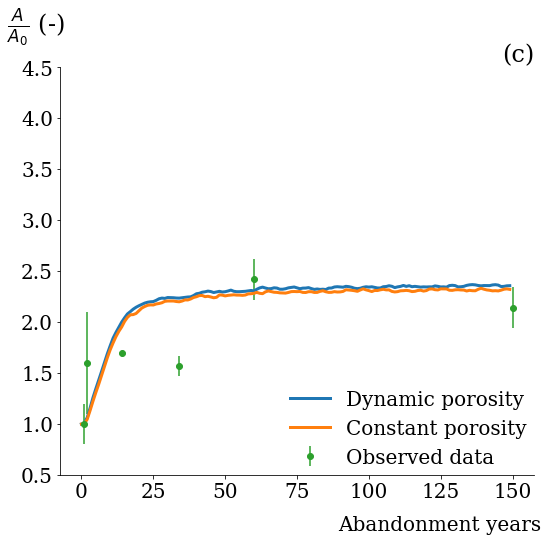

In [14]:
# Relative aggregates with A0
fig = plt.figure(figsize=(fw, fh))
ax1 = fig.add_subplot(111)
A0_D = df1.loc[2000].at['A'] # mean weight diameter at one year after abandonment for dynamic porosity
A0_C = df3.loc[2000].at['A'] # mean weight diameter at one year after abandonment for constant porosity
ax1.plot(df2['A']/A0_D, lw=3, label="Dynamic porosity")
ax1.plot(df4['A']/A0_C, lw=3, label="Constant porosity")
ax1.errorbar(x, y3, e3, color = 'tab:green', linestyle='None', marker='o', label="Observed data")
ax1.set_xlabel(r'Abandonment years', fontsize=fsl)
ax1.set_ylabel(r'$\frac{A}{A_0}$ (-)', rotation=0, fontsize=fsl2, labelpad=20)
ax1.legend(frameon=False, loc="lower right")
ax1.set_xticks(np.arange(0, 175, 25))
ax1.set_yticks(np.arange(0.5, 5, 0.5))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_label_coords(0.80, -0.10)
ax1.yaxis.set_label_coords(-0.05, 1.05)
plt.title('(c)', loc= 'right')

Text(1.0, 1.0, '(d)')

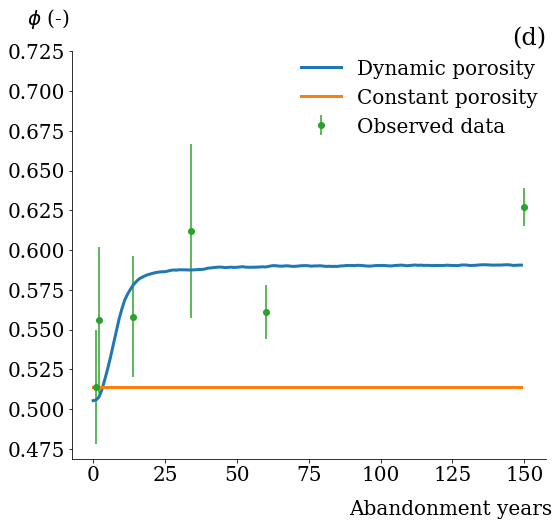

In [15]:
# Total Porosity
fig = plt.figure(figsize=(fw, fh))
ax1 = fig.add_subplot(111)
ax1.plot(df2['phi'], lw=3, label="Dynamic porosity")
ax1.plot(df4['phi'], lw=3, label="Constant porosity")
ax1.errorbar(x, y1, e1,color = 'tab:green', linestyle='None', marker='o', label="Observed data")
ax1.set_xticks(np.arange(0, 175, 25))
ax1.set_yticks(np.arange(0.475, 0.750, 0.025))
ax1.set_xlabel(r'Abandonment years', fontsize=fsl)
ax1.set_ylabel(r'$\phi$ (-)', rotation=0, fontsize=fsl, labelpad=20)
ax1.legend(frameon=False, loc="upper right")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_label_coords(0.80, -0.10)
ax1.yaxis.set_label_coords(-0.05, 1.05)
plt.title('(d)', loc= 'right')

Text(1.0, 1.0, '(e)')

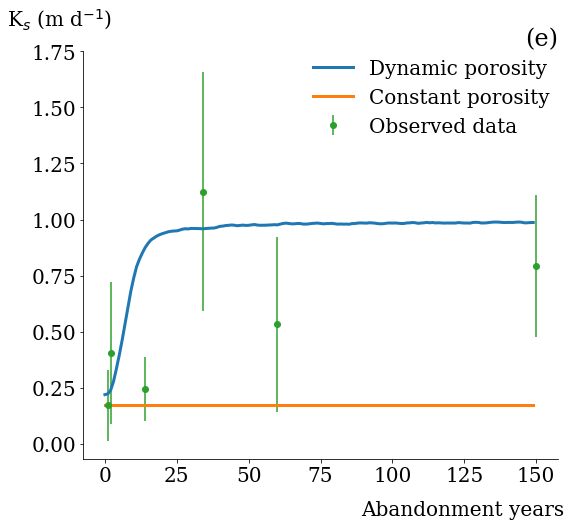

In [16]:
# Total saturated hydraulic Conductivity
fig = plt.figure(figsize=(fw, fh))
ax1 = fig.add_subplot(111)
kstex = 0.172  #m/d
ax1.plot(df2['ksstr'] + kstex, lw=3, label="Dynamic porosity")
ax1.plot(df4['ksstr'] + kstex, lw=3, label="Constant porosity")
ax1.errorbar(x, y2, e2, color = 'tab:green', linestyle='None', marker='o', label="Observed data")
ax1.set_xticks(np.arange(0, 175, 25))
ax1.set_yticks(np.arange(0.00, 2.00, 0.25))
ax1.set_xlabel(r'Abandonment years', fontsize=fsl)
ax1.set_ylabel(r'K$_s$ (m d$^{-1}$)', rotation=0, fontsize=fsl, labelpad=20)
ax1.legend(frameon=False, loc="upper right")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_label_coords(0.80, -0.10)
ax1.yaxis.set_label_coords(-0.05, 1.05)
plt.title('(e)', loc= 'right')

Text(1.25, 1.45, '(f)')

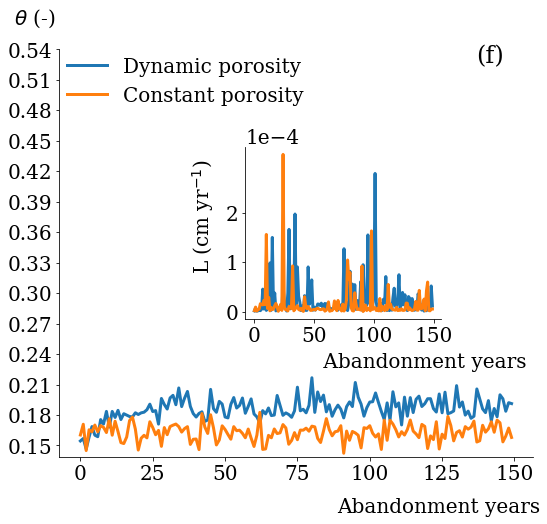

In [17]:
# Annual volumetric water content
fig, ax1 = plt.subplots(figsize=(fw, fh))
left, bottom, width, height = [0.43, 0.38, 0.32, 0.32]
ax2 = fig.add_axes([left, bottom, width, height])
ax1.plot(df2['s'] * df2['phi'],lw=3,label="Dynamic porosity")
ax1.plot(df4['s'] * df4['phi'],lw=3,label="Constant porosity")
ax1.set_ylabel(r'$\theta$ (-)', rotation=0, fontsize = fsl, labelpad=20)
ax1.set_xlabel(r'Abandonment years', fontsize=fsl)
ax2.plot(df2['lk']*(100),lw=3)
ax2.plot(df4['lk']*(100),lw=3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_label_coords(0.80, -0.10)
ax1.yaxis.set_label_coords(-0.05, 1.05)
ax1.set_xticks(np.arange(0, 175, 25))
ax1.set_yticks(np.arange(0.15, 0.55, 0.03))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.xaxis.set_label_coords(0.90, -0.19)
ax2.yaxis.set_label_coords(-0.15, 0.60)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_ylabel(r'L (cm yr$^{-1}$)', rotation=90, fontsize = fsl, labelpad=20)
ax2.set_xlabel(r' Abandonment years', fontsize = fsl)
ax2.set_xticks(np.arange(0, 175, 50))
ax2.set_yticks(np.arange(0.0, 0.25*10**-3, 10**-4))
ax1.legend(frameon=False, loc="upper left")
plt.title('(f)', x= 1.25, y= 1.45)